In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# HPI

In [109]:
#Load dataset

hpi_file_path = '../Data/HPI_master.xlsx'
hpi_data = pd.read_excel(hpi_file_path)

# Display the first few rows of the dataset to understand its structure
hpi_data.head()


,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,quarter,period,index_nsa,index_sa
0,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1999,1999Q1,1,112.00,NaN
1,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1999,1999Q2,2,113.30,NaN
2,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1999,1999Q3,3,114.39,NaN
3,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1999,1999Q4,4,115.42,NaN
4,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,2000,2000Q1,1,113.97,NaN


In [27]:
# Checking the completeness of 'index_nsa' and 'index_sa'
index_nsa_null_count = hpi_data['index_nsa'].isnull().sum()
index_sa_null_count = hpi_data['index_sa'].isnull().sum()

# List of unique MSAs
unique_msas = hpi_data['place_name'].unique()

index_nsa_null_count, index_sa_null_count, len(unique_msas)

(0, 39577, 404)

In [28]:
import numpy as np

# Grouping the data by MSA and calculating summary statistics for each
msa_summary = hpi_data.groupby('place_name')['index_nsa'].agg(['mean', 'std', 'min', 'max'])

# Calculating the range (max-min) and coefficient of variation (std/mean) for each MSA
msa_summary['range'] = msa_summary['max'] - msa_summary['min']
msa_summary['coefficient_of_variation'] = msa_summary['std'] / msa_summary['mean']

# Identifying standout MSAs based on high range and high coefficient of variation
standout_msas = msa_summary[(msa_summary['range'] > msa_summary['range'].quantile(0.95)) | 
                            (msa_summary['coefficient_of_variation'] > msa_summary['coefficient_of_variation'].quantile(0.95))]

# Displaying the standout MSAs
standout_msas.head(), len(standout_msas)

(                                           mean         std     min     max  \
 place_name                                                                    
 Anaheim-Santa Ana-Irvine, CA (MSAD)  281.534082   90.699783  120.60  505.26   
 Austin-Round Rock-Georgetown, TX     243.065918  112.338864  116.17  576.99   
 Barnstable Town, MA                  276.726939   75.380608  123.27  499.53   
 Bend, OR                             252.677449  111.204168  120.96  554.13   
 Boise City, ID                       206.820204   98.385918  114.77  497.41   
 
                                       range  coefficient_of_variation  
 place_name                                                             
 Anaheim-Santa Ana-Irvine, CA (MSAD)  384.66                  0.322163  
 Austin-Round Rock-Georgetown, TX     460.82                  0.462174  
 Barnstable Town, MA                  376.26                  0.272401  
 Bend, OR                             433.17                  0.440103  


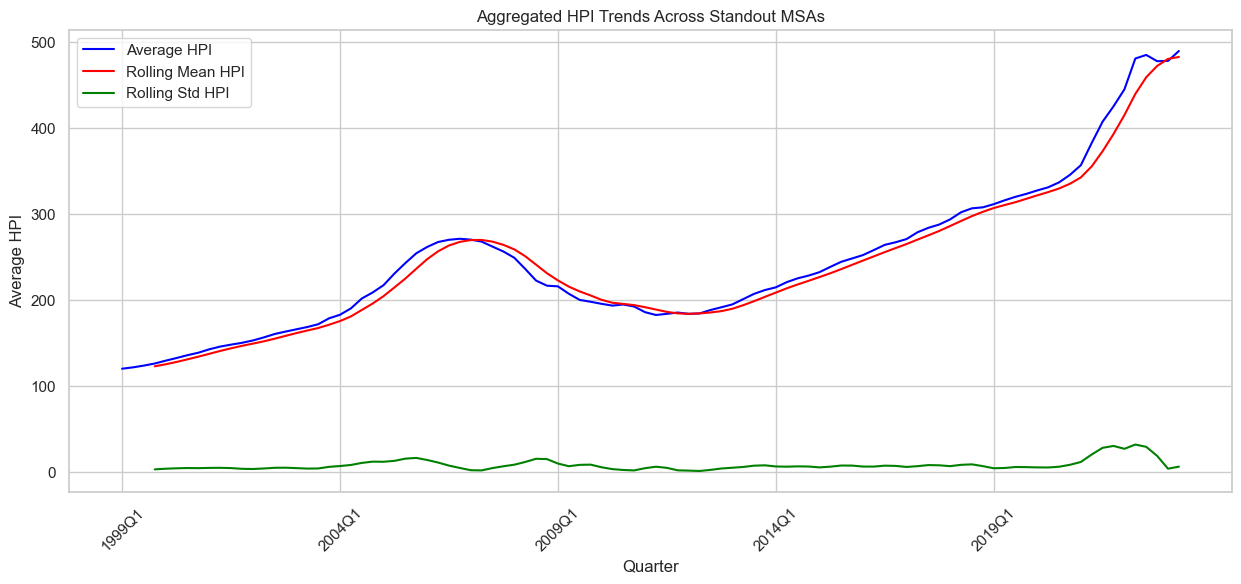

In [30]:
# Aggregating data for standout MSAs
standout_msa_data = hpi_data[hpi_data['place_name'].isin(standout_msas.index)]

# Calculating the mean HPI for each quarter across all standout MSAs
aggregated_hpi = standout_msa_data.groupby('quarter')['index_nsa'].mean().reset_index()

# Calculating rolling mean and standard deviation for the aggregated data
aggregated_hpi['Rolling Mean HPI'] = aggregated_hpi['index_nsa'].rolling(window=rolling_window_hpi).mean()
aggregated_hpi['Rolling Std HPI'] = aggregated_hpi['index_nsa'].rolling(window=rolling_window_hpi).std()

# Plotting the aggregated trends
plt.figure(figsize=(15, 6))
plt.plot(aggregated_hpi['quarter'], aggregated_hpi['index_nsa'], label='Average HPI', color='blue')
plt.plot(aggregated_hpi['quarter'], aggregated_hpi['Rolling Mean HPI'], label='Rolling Mean HPI', color='red')
plt.plot(aggregated_hpi['quarter'], aggregated_hpi['Rolling Std HPI'], label='Rolling Std HPI', color='green')
plt.title('Aggregated HPI Trends Across Standout MSAs')
plt.xlabel('Quarter')
plt.ylabel('Average HPI')
plt.xticks(np.arange(0, len(aggregated_hpi['quarter']), step=20), rotation=45)  # Adjusting x-axis labels
plt.legend()
plt.grid(True)
plt.show()


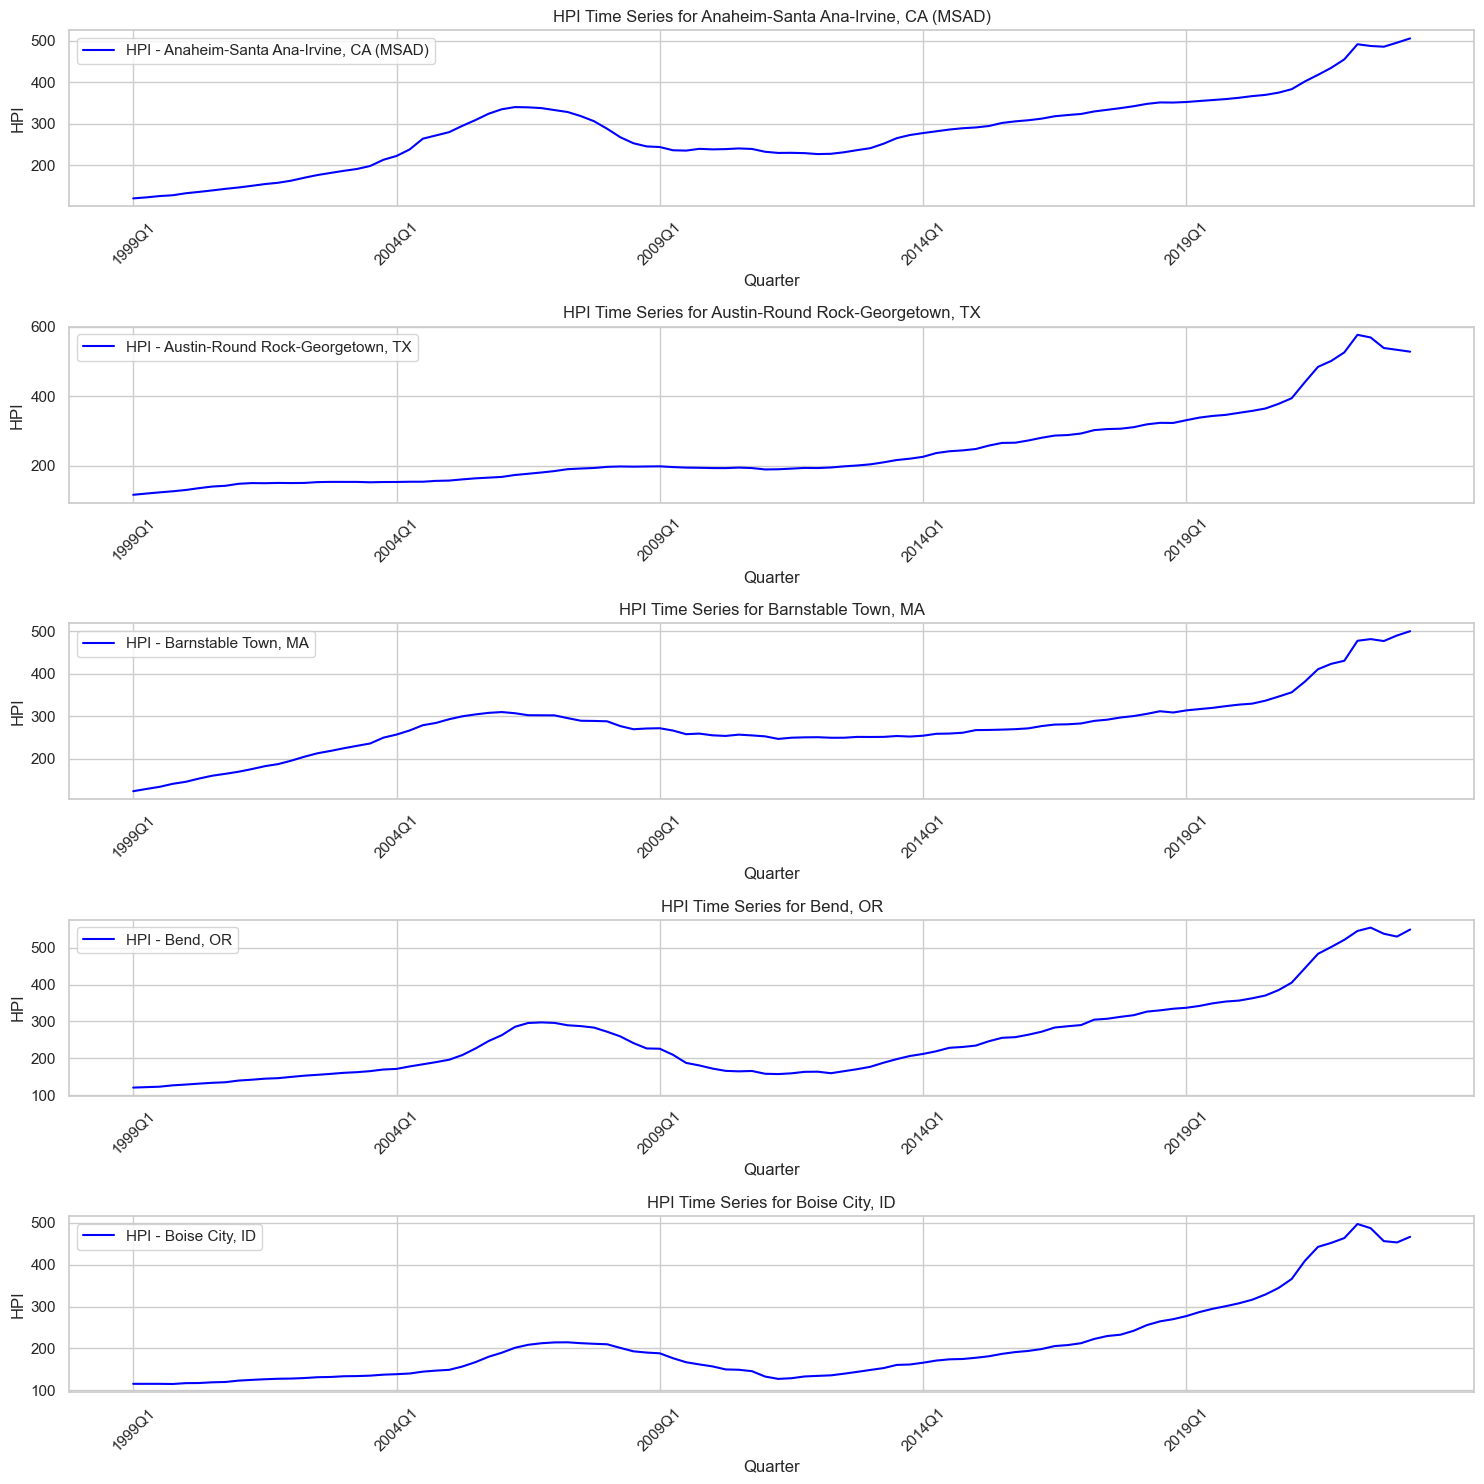

In [31]:
# Selecting a subset of standout MSAs for time series plots (due to large number of standout MSAs)
subset_msas = standout_msas.head(5).index  # Selecting the first 5 standout MSAs for demonstration

# Filter the data for the selected subset of MSAs
subset_msa_data = hpi_data[hpi_data['place_name'].isin(subset_msas)]

# Plotting time series for each MSA in the subset
plt.figure(figsize=(15, 15))
for i, msa in enumerate(subset_msas, 1):
    plt.subplot(len(subset_msas), 1, i)
    msa_specific_data = subset_msa_data[subset_msa_data['place_name'] == msa]
    plt.plot(msa_specific_data['quarter'], msa_specific_data['index_nsa'], label=f'HPI - {msa}', color='blue')
    plt.title(f'HPI Time Series for {msa}')
    plt.xlabel('Quarter')
    plt.ylabel('HPI')
    plt.xticks(np.arange(0, len(msa_specific_data['quarter']), step=20), rotation=45)  # Adjusting x-axis labels
    plt.legend()
    plt.tight_layout()

plt.show()

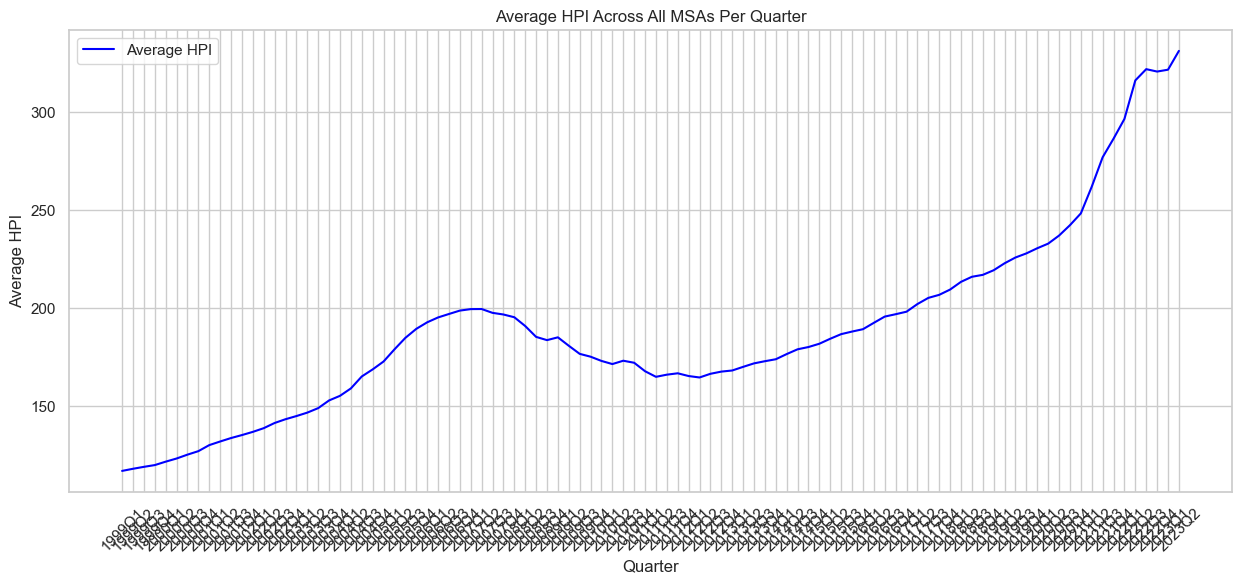

In [38]:
# It seems that the code execution state was reset, and the data needs to be reloaded.
# I will reload the data, perform the necessary calculations, and plot the average HPI again.

import pandas as pd
import matplotlib.pyplot as plt

# Reload the data


# Calculating the average HPI for each quarter across all MSAs
average_hpi_per_quarter = hpi_data.groupby('quarter')['index_nsa'].mean().reset_index()

# Plotting the average HPI time series
plt.figure(figsize=(15, 6))
plt.plot(average_hpi_per_quarter['quarter'], average_hpi_per_quarter['index_nsa'], label='Average HPI', color='blue')
plt.title('Average HPI Across All MSAs Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average HPI')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


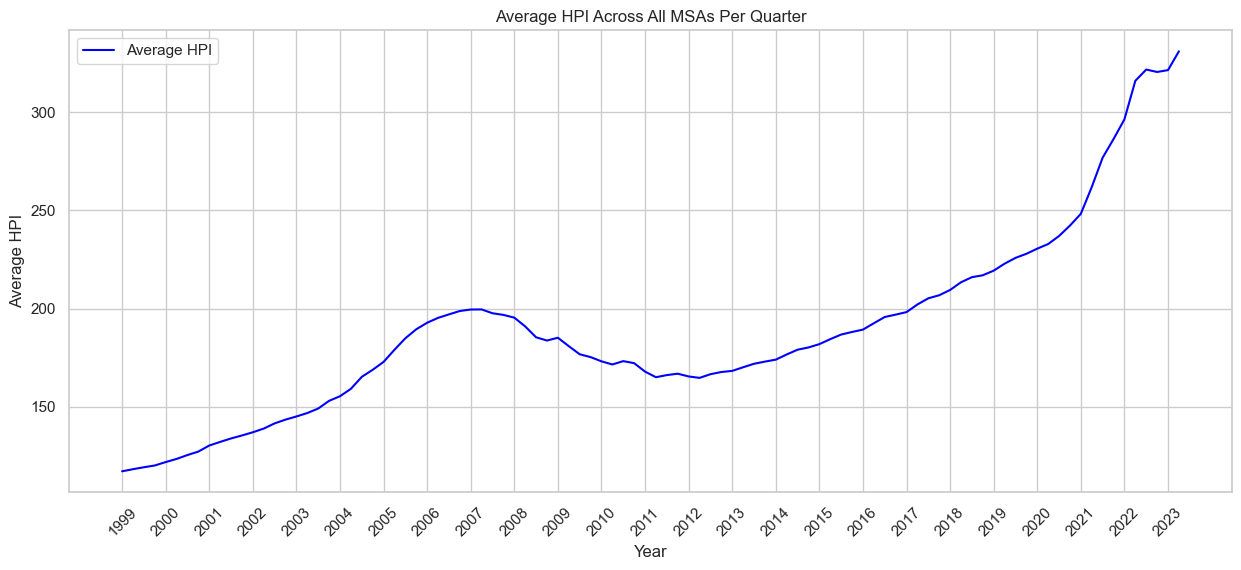

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(average_hpi_per_quarter['quarter'], average_hpi_per_quarter['index_nsa'], label='Average HPI', color='blue')
plt.title('Average HPI Across All MSAs Per Quarter')
plt.xlabel('Year')
plt.ylabel('Average HPI')

# Create a dictionary to map quarters to their positions
quarter_positions = {quarter: i for i, quarter in enumerate(average_hpi_per_quarter['quarter'])}

# Filter and label only specific quarters
xticks_positions = [quarter_positions[quarter] for quarter in average_hpi_per_quarter['quarter'] if quarter.endswith('Q1') and (quarter.startswith('19') or quarter.startswith('20'))]
xticks_labels = [quarter.split('Q1')[0] for quarter in average_hpi_per_quarter['quarter'] if quarter.endswith('Q1') and (quarter.startswith('19') or quarter.startswith('20'))]

plt.xticks(xticks_positions, xticks_labels, rotation=45)

plt.grid(True)
plt.legend()
plt.show()

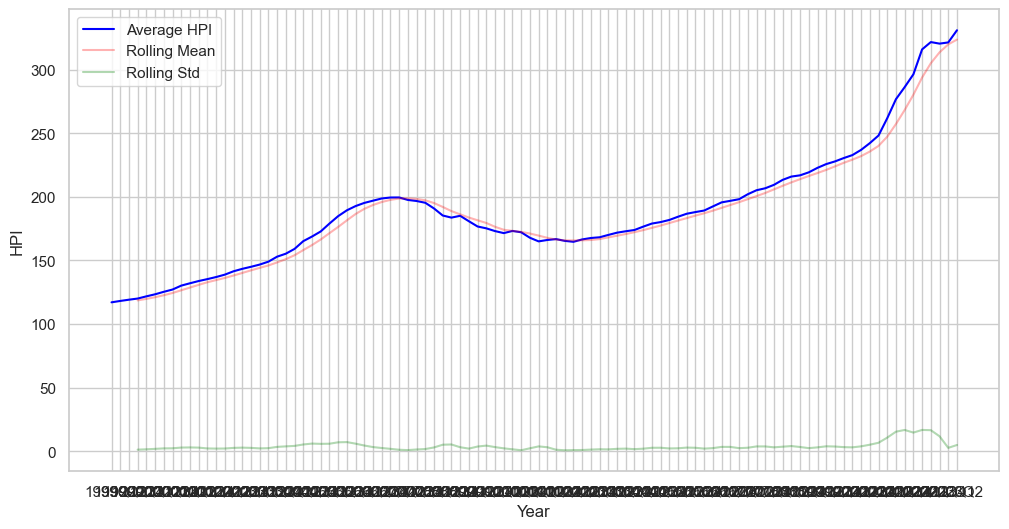

In [122]:
average_hpi = hpi_data.groupby('quarter')['index_nsa'].mean().reset_index()
rolling_window = 4  # 4 quarters for a yearly rolling window
average_hpi['Rolling Mean'] = average_hpi['index_nsa'].rolling(window=rolling_window).mean()
average_hpi['Rolling Std'] = average_hpi['index_nsa'].rolling(window=rolling_window).std()
plt.figure(figsize=(12, 6))
plt.plot(average_hpi['quarter'], average_hpi['index_nsa'], label='Average HPI', color='blue')
plt.plot(average_hpi['quarter'], average_hpi['Rolling Mean'], label='Rolling Mean', color='red', alpha=0.3)
plt.plot(average_hpi['quarter'], average_hpi['Rolling Std'], label='Rolling Std', color='green', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('HPI')
plt.legend()
plt.show()


/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


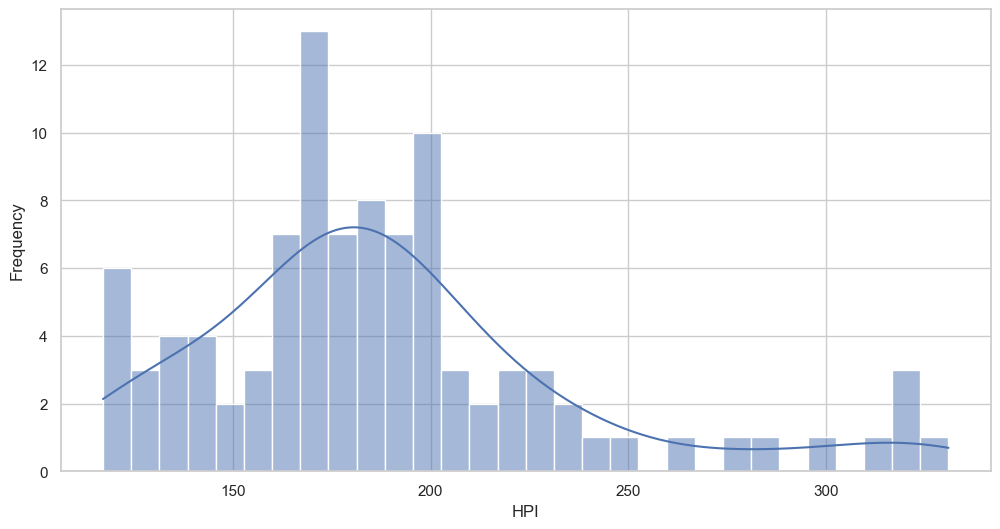

/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


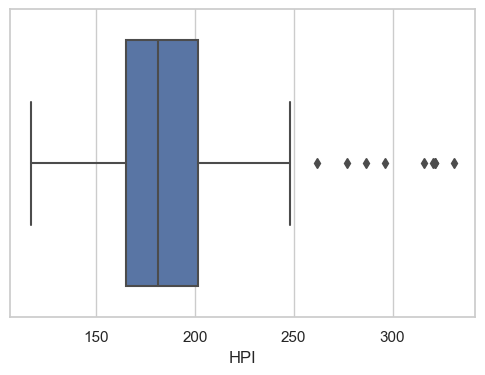

In [123]:
plt.figure(figsize=(12, 6))
sns.histplot(average_hpi['index_nsa'], kde=True, bins=30)
plt.xlabel('HPI')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=average_hpi['index_nsa'])
plt.xlabel('HPI')
plt.show()


/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/c1/zsf9b64s44n17287k844v5v40000gn/T/ipykernel_73653/2204647739.py:61: UserWarning: This figure includes Axes that

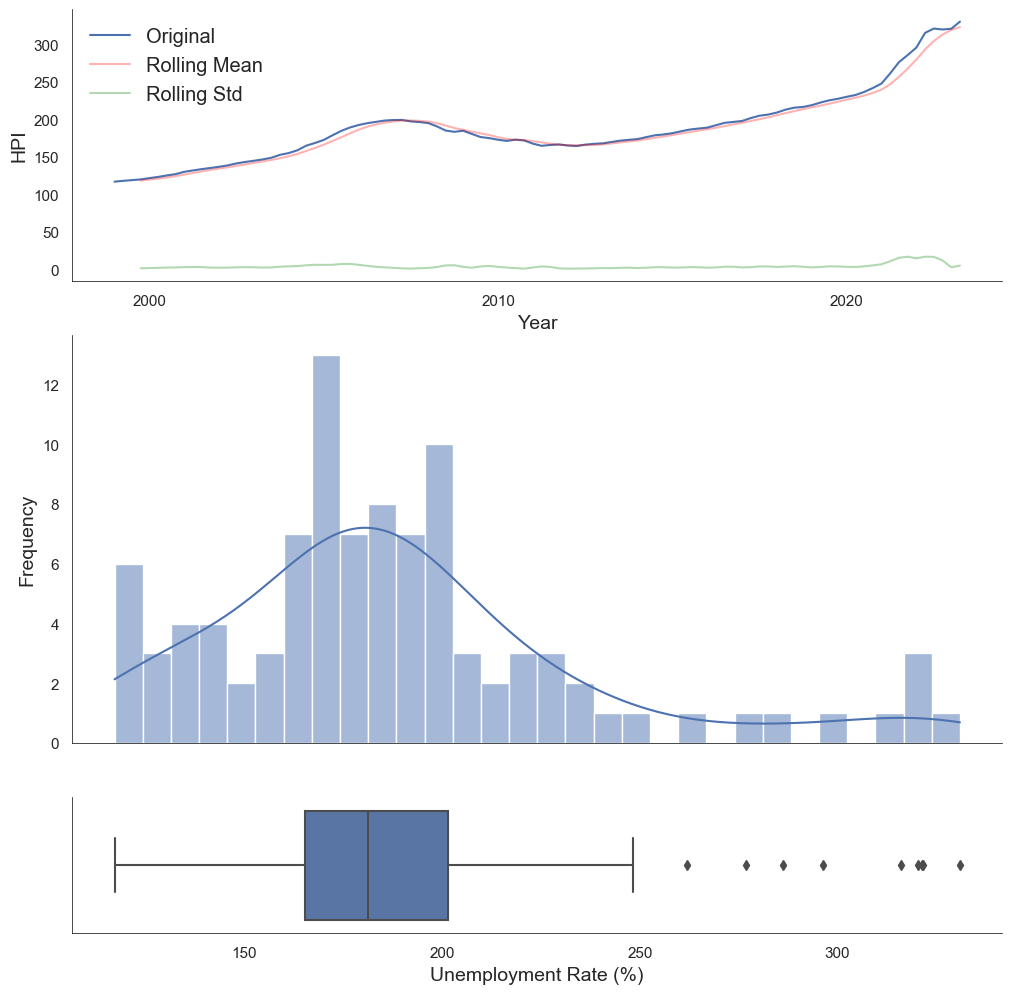

In [131]:

# Extract just the year from the 'quarter' column
average_hpi['Year'] = average_hpi['quarter'].apply(lambda x: x[:4])

# Get the unique years to set as x-ticks
unique_years = average_hpi['Year'].unique()
years_every_10 = [year for year in unique_years if int(year) % 10 == 0]
# Now create the plot
plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 3, 1], hspace=0.2)

# Subplot 1: Rolling statistics plot
ax0 = plt.subplot(gs[0])

plt.grid(False)
ax0.plot(average_hpi['quarter'], average_hpi['index_nsa'], color='C0', label='Original')
ax0.plot(average_hpi['quarter'], average_hpi['Rolling Mean'], color='red', label='Rolling Mean', alpha=0.3)
ax0.plot(average_hpi['quarter'], average_hpi['Rolling Std'], color='green', label='Rolling Std', alpha=0.3)
ax0.set_xlabel('Year', fontsize=14)
ax0.set_ylabel('HPI', fontsize=14)
legend = ax0.legend(fontsize='large')
legend.get_frame().set_edgecolor('none')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_linewidth(0.5)
ax0.spines['left'].set_linewidth(0.5)
ax0.spines['left'].set_color('black')
ax0.spines['bottom'].set_color('black')

# Set the x-ticks to show only the years
ax0.set_xticks([quarter for quarter in average_hpi['quarter'] if quarter.endswith('Q1') and quarter[:4] in years_every_10])
ax0.set_xticklabels(years_every_10)

# Subplot 2: Histogram with KDE
ax1 = plt.subplot(gs[1])
sns.histplot(average_hpi['index_nsa'], kde=True, color='C0', bins=30, ax=ax1)
# ax1.set_title('Distribution of Unemployment Rates')
ax1.set_xlabel('')
ax1.set_ylabel('Frequency', fontsize=14)
# Turn off x-ticks for ax1 to avoid overlap with the boxplot below and remove top/right axis lines
ax1.xaxis.set_tick_params(labelbottom=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
plt.grid(False)

# Subplot 3: Boxplot
ax2 = plt.subplot(gs[2], sharex=ax1)
sns.boxplot(x=average_hpi['index_nsa'], color='C0', ax=ax2)
ax2.set_xlabel('Unemployment Rate (%)', fontsize=14)
ax2.set_ylabel('')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(0.5)
ax2.spines['left'].set_linewidth(0.5)
ax2.spines['left'].set_color('black')
ax2.spines['bottom'].set_color('black')
plt.grid(False)
plt.tight_layout()
# Adjust the layout
plt.savefig('../Plots/HPIData.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

# Unemployment Rate

In [116]:
#Load dataset
file_path = '../Data/UNRATE.csv'
# Reload the data with the correct delimiter
unrate_data = pd.read_csv(file_path, delimiter=';')

# Convert 'DATE' column to datetime format
unrate_data['DATE'] = pd.to_datetime(unrate_data['DATE'], format='%d/%m/%Y')

# Display the first few rows and summary statistics
unrate_data_head = unrate_data.head()
unrate_data_description = unrate_data.describe()

unrate_data_description

,DATE,UNRATE
count,909,909.000000
mean,1985-10-31 07:15:38.613861376,5.711661
min,1948-01-01 00:00:00,2.500000
25%,1966-12-01 00:00:00,4.400000
50%,1985-11-01 00:00:00,5.500000
75%,2004-10-01 00:00:00,6.700000
max,2023-09-01 00:00:00,14.700000
std,NaN,1.708123


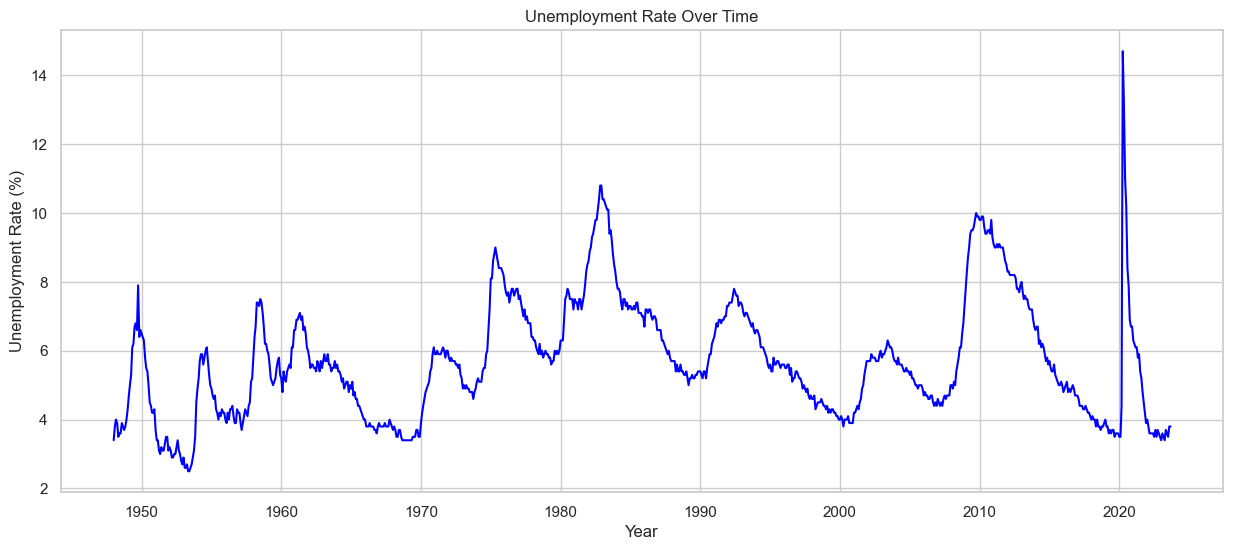

In [117]:
# Set the style for the plots
sns.set(style="whitegrid")

# Time Series Plot
plt.figure(figsize=(15, 6))
plt.plot(unrate_data['DATE'], unrate_data['UNRATE'], color='blue')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


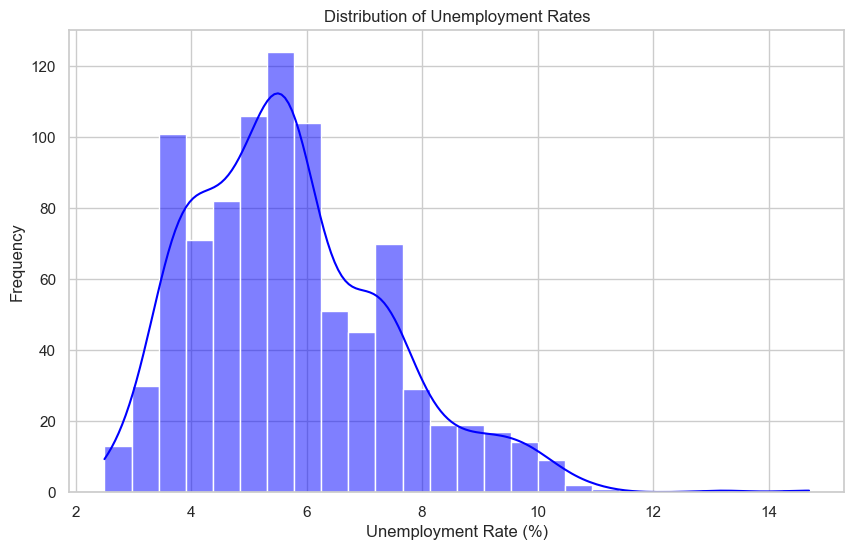

In [118]:
# Histogram of the Unemployment Rate
plt.figure(figsize=(10, 6))
sns.histplot(unrate_data['UNRATE'], kde=True, color='blue')
plt.title('Distribution of Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


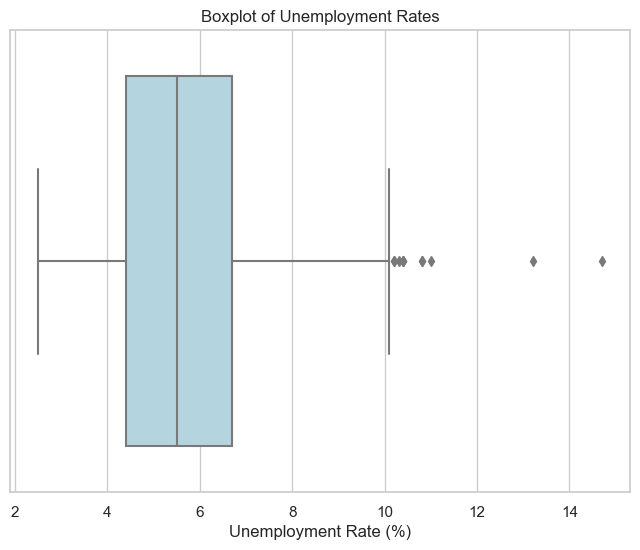

In [119]:
# Boxplot of the Unemployment Rate
plt.figure(figsize=(8, 6))
sns.boxplot(x=unrate_data['UNRATE'], color='lightblue')
plt.title('Boxplot of Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')
plt.show()

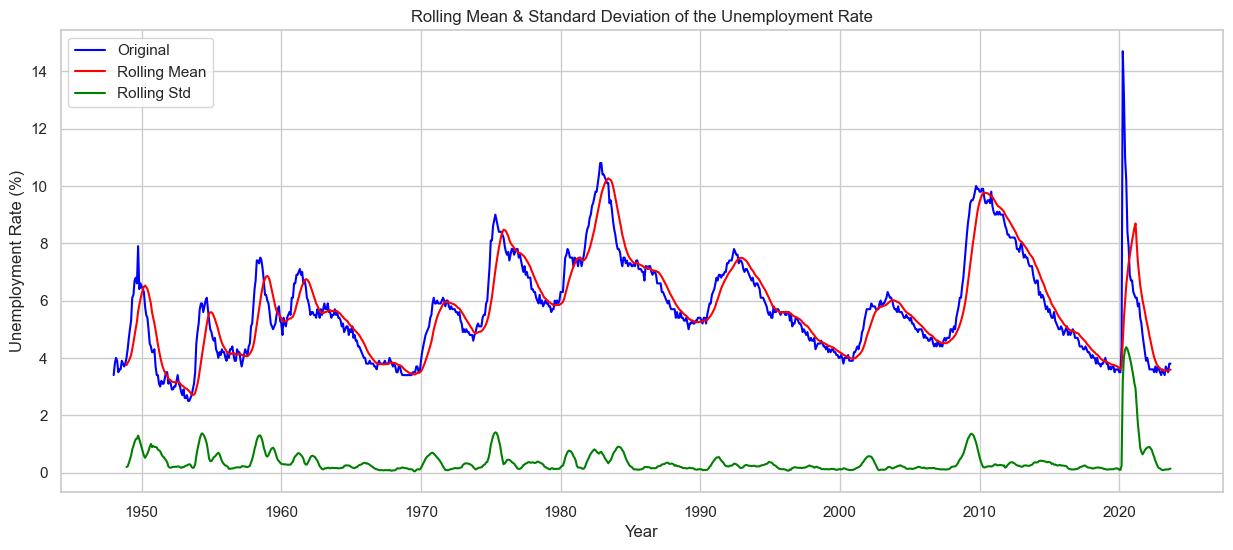

In [120]:
# Calculate rolling mean and standard deviation with a 12-month window
rolling_window = 12
unrate_data['Rolling Mean'] = unrate_data['UNRATE'].rolling(window=rolling_window).mean()
unrate_data['Rolling Std'] = unrate_data['UNRATE'].rolling(window=rolling_window).std()

# Plotting the rolling statistics
plt.figure(figsize=(15, 6))
plt.plot(unrate_data['DATE'], unrate_data['UNRATE'], color='blue', label='Original')
plt.plot(unrate_data['DATE'], unrate_data['Rolling Mean'], color='red', label='Rolling Mean')
plt.plot(unrate_data['DATE'], unrate_data['Rolling Std'], color='green', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation of the Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/c1/zsf9b64s44n17287k844v5v40000gn/T/ipykernel_73653/1863102838.py:54: UserWarning: This figure includes Axes that

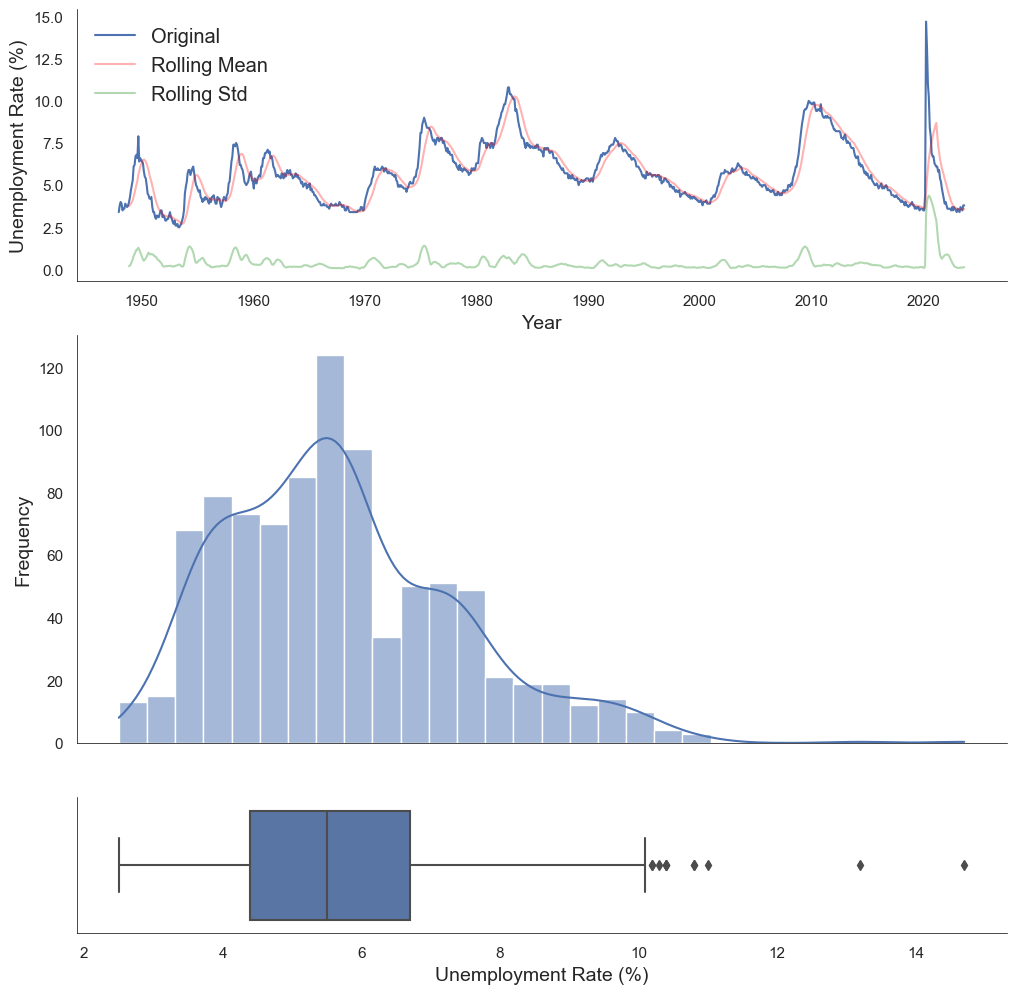

In [121]:
# Modify the code to add the x-axis back to the time series plot
plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 3, 1], hspace=0.2)  # 3 rows, 1 column, with spacing

# Subplot 1: Rolling statistics plot
ax0 = plt.subplot(gs[0])
ax0.plot(unrate_data['DATE'], unrate_data['UNRATE'], color='C0', label='Original')
ax0.plot(unrate_data['DATE'], unrate_data['Rolling Mean'], color='red', label='Rolling Mean', alpha=0.3)
ax0.plot(unrate_data['DATE'], unrate_data['Rolling Std'], color='green', label='Rolling Std', alpha=0.3)
# ax0.set_title('Rolling Mean & Standard Deviation of the Unemployment Rate', fontsize=20)
ax0.set_xlabel('Year', fontsize = 14)
plt.grid(False)
ax0.set_ylabel('Unemployment Rate (%)', fontsize=14)
# ax0.legend()
legend = ax0.legend(fontsize='large')
legend.get_frame().set_edgecolor('none')
# Enable x-ticks for ax0 and remove top/right axis lines
ax0.xaxis.set_tick_params(labelbottom=True)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_linewidth(0.5)
ax0.spines['left'].set_linewidth(0.5)
ax0.spines['left'].set_color('black')
ax0.spines['bottom'].set_color('black')

# Subplot 2: Histogram with KDE
ax1 = plt.subplot(gs[1])
sns.histplot(unrate_data['UNRATE'], kde=True, color='C0', bins=30, ax=ax1)
# ax1.set_title('Distribution of Unemployment Rates')
ax1.set_xlabel('')
ax1.set_ylabel('Frequency', fontsize=14)
# Turn off x-ticks for ax1 to avoid overlap with the boxplot below and remove top/right axis lines
ax1.xaxis.set_tick_params(labelbottom=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
plt.grid(False)

# Subplot 3: Boxplot
ax2 = plt.subplot(gs[2], sharex=ax1)
sns.boxplot(x=unrate_data['UNRATE'], color='C0', ax=ax2)
ax2.set_xlabel('Unemployment Rate (%)', fontsize=14)
ax2.set_ylabel('')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(0.5)
ax2.spines['left'].set_linewidth(0.5)
ax2.spines['left'].set_color('black')
ax2.spines['bottom'].set_color('black')
plt.grid(False)
plt.tight_layout()
# Adjust the layout
plt.savefig('../Plots/UnrateData.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

# GDP

In [13]:
#Load dataset
# Load the data from the Excel file
gdp_file_path = '../Data/GDP.xlsx'
gdp_data = pd.read_excel(gdp_file_path)

# Display the first few rows of the dataset to understand its structure
gdp_data.head()


,observation_date,GDP,GDP_change,year,period,quarter
0,1947-01-01,243.164,0.000000,1947,1,1947Q1
1,1947-04-01,245.968,0.011531,1947,2,1947Q2
2,1947-07-01,249.585,0.014705,1947,3,1947Q3
3,1947-10-01,259.745,0.040708,1947,4,1947Q4
4,1948-01-01,265.742,0.023088,1948,1,1948Q1


In [14]:
# Summary statistics for GDP_change
gdp_change_summary_stats = gdp_data['GDP_change'].describe()

# Additional statistics for GDP_change
mode_gdp_change = gdp_data['GDP_change'].mode()[0]  # Most frequent value
range_gdp_change = gdp_data['GDP_change'].max() - gdp_data['GDP_change'].min()  # Range
variance_gdp_change = gdp_data['GDP_change'].var()  # Variance

additional_stats_gdp_change = {
    'Mode': mode_gdp_change,
    'Range': range_gdp_change,
    'Variance': variance_gdp_change
}

gdp_change_summary_stats, additional_stats_gdp_change



(count    307.000000
 mean       0.015619
 std        0.013011
 min       -0.082619
 25%        0.010067
 50%        0.014732
 75%        0.021125
 max        0.087103
 Name: GDP_change, dtype: float64,
 {'Mode': -0.08261898168535864,
  'Range': 0.16972210749528222,
  'Variance': 0.0001692965242604459})

/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


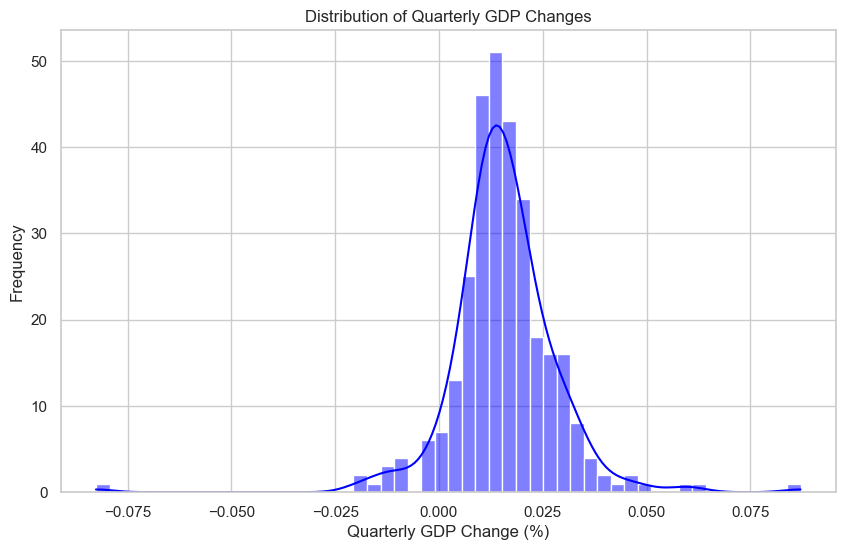

In [15]:
# Histogram of the Quarterly GDP Change
plt.figure(figsize=(10, 6))
sns.histplot(gdp_data['GDP_change'], kde=True, color='blue')
plt.title('Distribution of Quarterly GDP Changes')
plt.xlabel('Quarterly GDP Change (%)')
plt.ylabel('Frequency')
plt.show()

/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


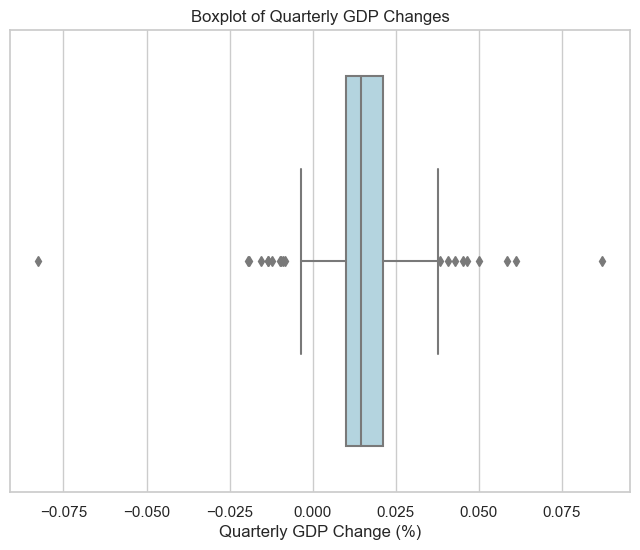

In [16]:
# Boxplot of the Quarterly GDP Change
plt.figure(figsize=(8, 6))
sns.boxplot(x=gdp_data['GDP_change'], color='lightblue')
plt.title('Boxplot of Quarterly GDP Changes')
plt.xlabel('Quarterly GDP Change (%)')
plt.show()

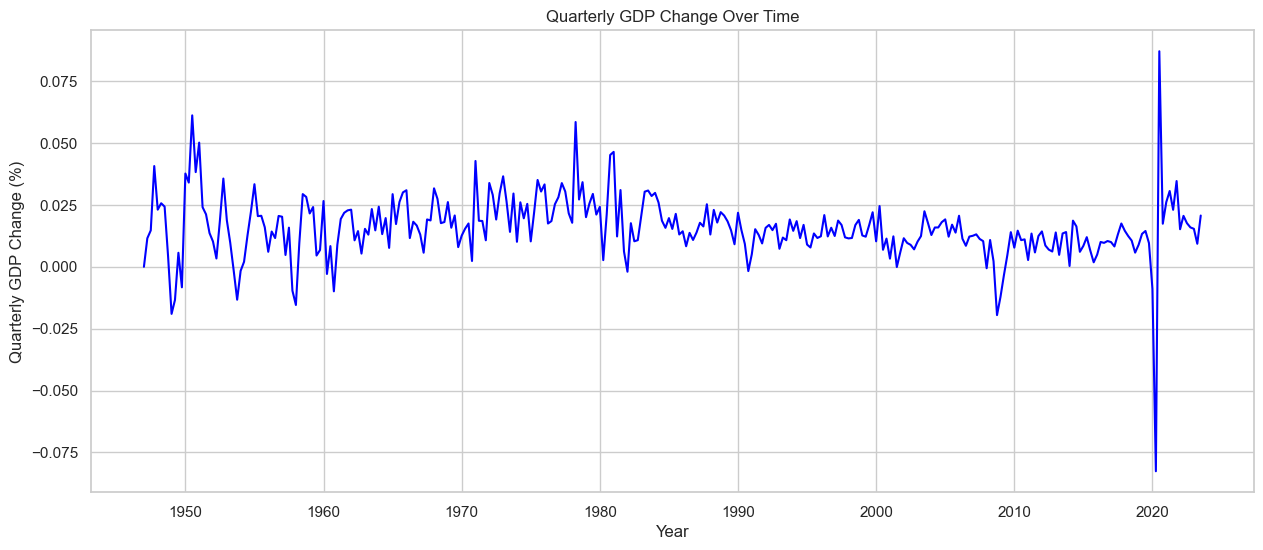

In [17]:
# Time Series Plot of Quarterly GDP Change
plt.figure(figsize=(15, 6))
plt.plot(gdp_data['observation_date'], gdp_data['GDP_change'], color='blue')
plt.title('Quarterly GDP Change Over Time')
plt.xlabel('Year')
plt.ylabel('Quarterly GDP Change (%)')
plt.grid(True)
plt.show()

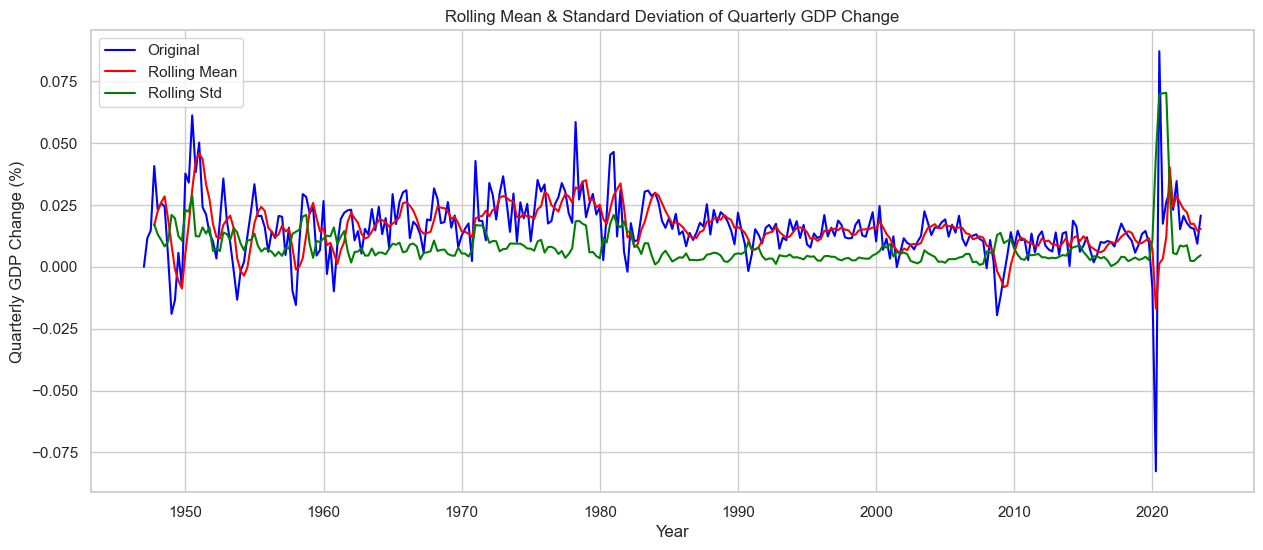

In [18]:
# Calculate rolling mean and standard deviation with a 4-quarter (1 year) window
rolling_window_gdp = 4
gdp_data['Rolling Mean GDP'] = gdp_data['GDP_change'].rolling(window=rolling_window_gdp).mean()
gdp_data['Rolling Std GDP'] = gdp_data['GDP_change'].rolling(window=rolling_window_gdp).std()

# Plotting the rolling statistics for GDP change
plt.figure(figsize=(15, 6))
plt.plot(gdp_data['observation_date'], gdp_data['GDP_change'], color='blue', label='Original')
plt.plot(gdp_data['observation_date'], gdp_data['Rolling Mean GDP'], color='red', label='Rolling Mean')
plt.plot(gdp_data['observation_date'], gdp_data['Rolling Std GDP'], color='green', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation of Quarterly GDP Change')
plt.xlabel('Year')
plt.ylabel('Quarterly GDP Change (%)')
plt.legend()
plt.grid(True)
plt.show()

/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/c1/zsf9b64s44n17287k844v5v40000gn/T/ipykernel_73653/1214826310.py:59: UserWarning: This figure includes Axes that

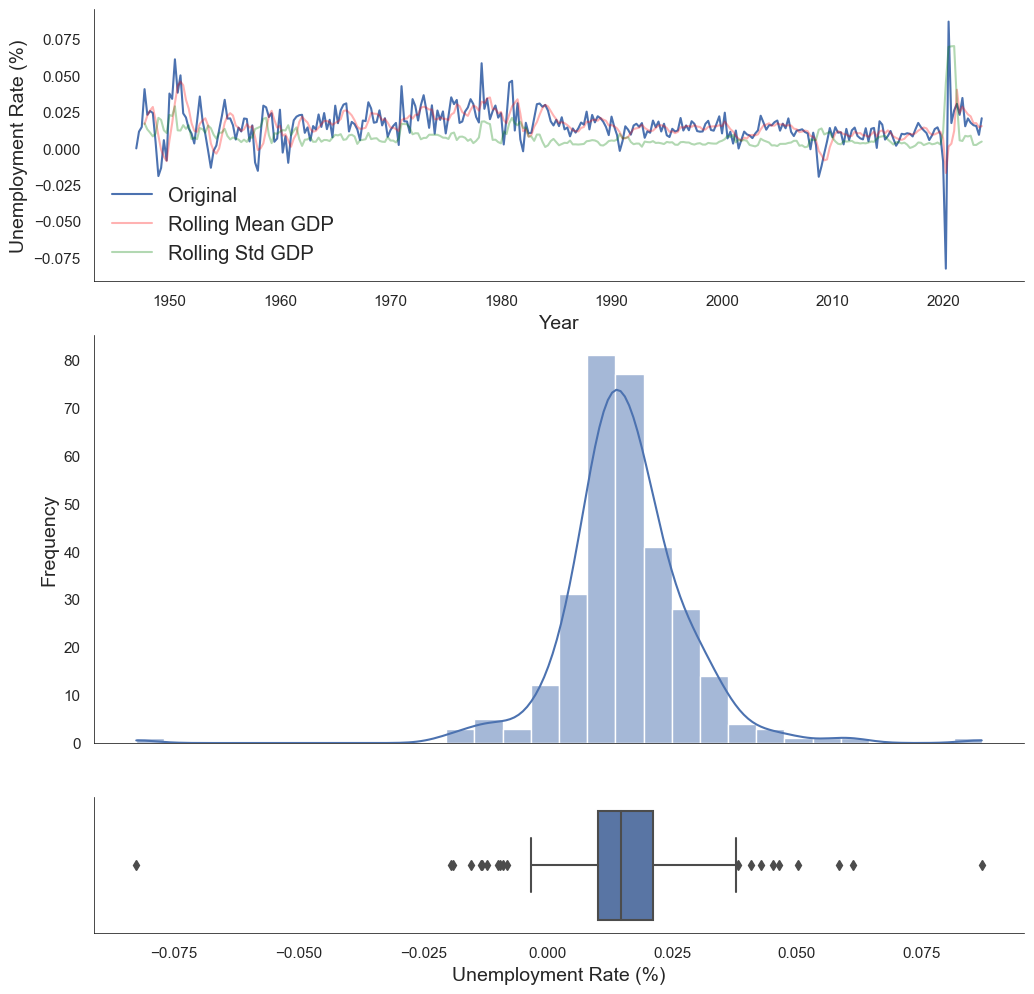

In [103]:
# Modify the code to add the x-axis back to the time series plot
plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 3, 1], hspace=0.2)  # 3 rows, 1 column, with spacing

# Subplot 1: Rolling statistics plot
ax0 = plt.subplot(gs[0])
ax0.plot(gdp_data['observation_date'], gdp_data['GDP_change'], color='C0', label='Original')
ax0.plot(gdp_data['observation_date'], gdp_data['Rolling Mean GDP'], color='red', label='Rolling Mean GDP', alpha=0.3)
ax0.plot(gdp_data['observation_date'], gdp_data['Rolling Std GDP'], color='green', label='Rolling Std GDP', alpha=0.3)
# ax0.set_title('Rolling Mean & Standard Deviation of the Unemployment Rate', fontsize=20)
ax0.set_xlabel('Year', fontsize = 14)
plt.grid(False)
ax0.set_ylabel('Unemployment Rate (%)', fontsize=14)
legend = ax0.legend(fontsize='large')
legend.get_frame().set_edgecolor('none')

# Enable x-ticks for ax0 and remove top/right axis lines
ax0.xaxis.set_tick_params(labelbottom=True)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_color('black')
ax0.spines['bottom'].set_color('black')
ax0.spines['bottom'].set_linewidth(0.5)
ax0.spines['left'].set_linewidth(0.5)
# Subplot 2: Histogram with KDE
ax1 = plt.subplot(gs[1])
sns.histplot(gdp_data['GDP_change'], kde=True, color='C0', bins=30, ax=ax1)
# ax1.set_title('Distribution of Unemployment Rates')
ax1.set_xlabel('')
ax1.set_ylabel('Frequency', fontsize=14)
# Turn off x-ticks for ax1 to avoid overlap with the boxplot below and remove top/right axis lines
ax1.xaxis.set_tick_params(labelbottom=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_linewidth(0.5)

plt.grid(False)

# Subplot 3: Boxplot
ax2 = plt.subplot(gs[2], sharex=ax1)
sns.boxplot(x=gdp_data['GDP_change'], color='C0', ax=ax2)
ax2.set_xlabel('Unemployment Rate (%)', fontsize=14)
ax2.set_ylabel('')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['bottom'].set_linewidth(0.5)
ax2.spines['left'].set_linewidth(0.5)

plt.grid(False)

# Adjust the layout
plt.savefig('../Plots/GDPData.png', bbox_inches='tight', pad_inches=0.1)
plt.tight_layout()
plt.show()

# CPI

In [20]:
#Load dataset
cpi_file_path = '../Data/CPI_Urban.xlsx'
cpi_data = pd.read_excel(cpi_file_path)

# Display the first few rows of the dataset to understand its structure
cpi_data.head()

,Date,CPI_SA,CPI_SA_change
0,1990-01-01,127.5,0.000000
1,1990-02-01,128.0,0.003922
2,1990-03-01,128.6,0.004687
3,1990-04-01,128.9,0.002333
4,1990-05-01,129.1,0.001552


In [21]:
# Summary statistics for CPI_SA_change
cpi_change_summary_stats = cpi_data['CPI_SA_change'].describe()

# Additional statistics for CPI_SA_change
mode_cpi_change = cpi_data['CPI_SA_change'].mode()[0]  # Most frequent value
range_cpi_change = cpi_data['CPI_SA_change'].max() - cpi_data['CPI_SA_change'].min()  # Range
variance_cpi_change = cpi_data['CPI_SA_change'].var()  # Variance

additional_stats_cpi_change = {
    'Mode': mode_cpi_change,
    'Range': range_cpi_change,
    'Variance': variance_cpi_change
}

cpi_change_summary_stats, additional_stats_cpi_change

(count    406.000000
 mean       0.002175
 std        0.002729
 min       -0.017705
 25%        0.000867
 50%        0.002133
 75%        0.003467
 max        0.013768
 Name: CPI_SA_change, dtype: float64,
 {'Mode': 0.0,
  'Range': 0.03147396255132428,
  'Variance': 7.449804061952504e-06})

/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


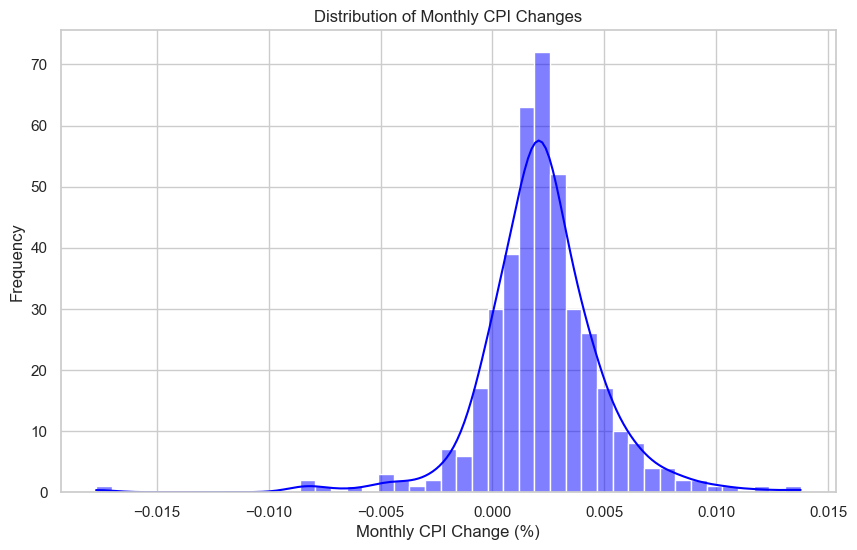

In [22]:
# Histogram of the Monthly CPI Change
plt.figure(figsize=(10, 6))
sns.histplot(cpi_data['CPI_SA_change'], kde=True, color='blue')
plt.title('Distribution of Monthly CPI Changes')
plt.xlabel('Monthly CPI Change (%)')
plt.ylabel('Frequency')
plt.show()

/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


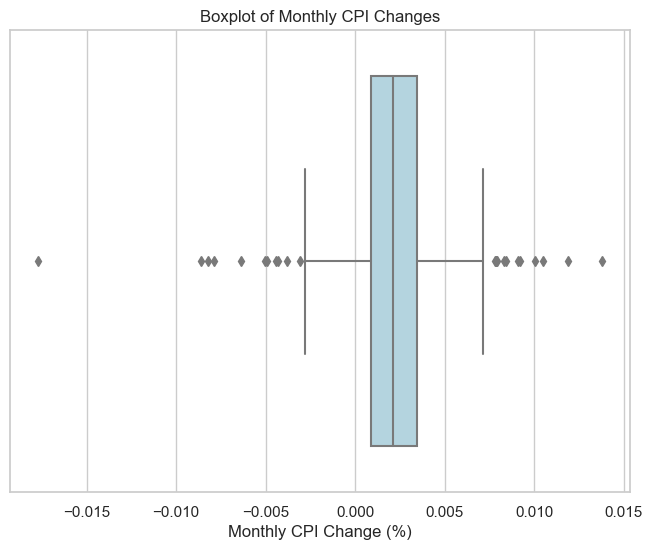

In [23]:
# Boxplot of the Monthly CPI Change
plt.figure(figsize=(8, 6))
sns.boxplot(x=cpi_data['CPI_SA_change'], color='lightblue')
plt.title('Boxplot of Monthly CPI Changes')
plt.xlabel('Monthly CPI Change (%)')
plt.show()

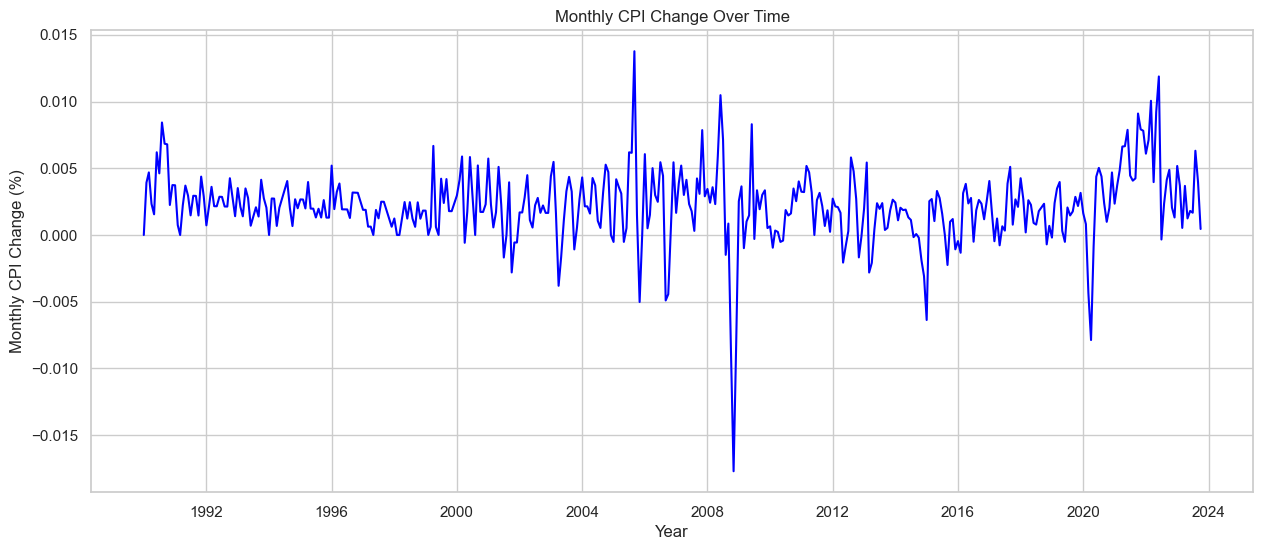

In [24]:
# Time Series Plot of Monthly CPI Change
plt.figure(figsize=(15, 6))
plt.plot(cpi_data['Date'], cpi_data['CPI_SA_change'], color='blue')
plt.title('Monthly CPI Change Over Time')
plt.xlabel('Year')
plt.ylabel('Monthly CPI Change (%)')
plt.grid(True)
plt.show()

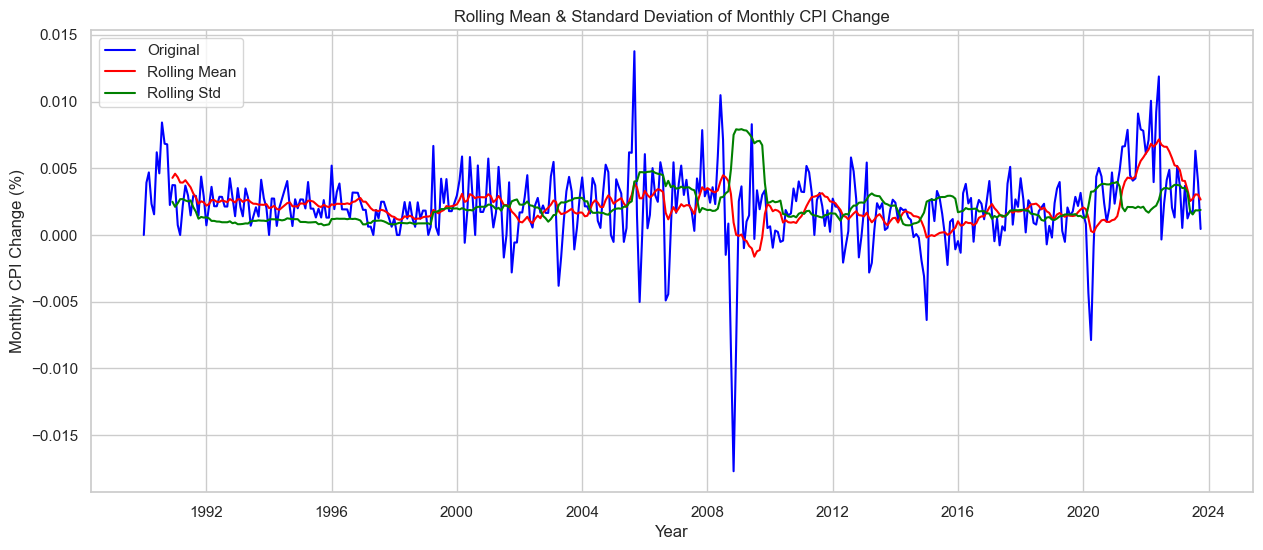

In [25]:
# Calculate rolling mean and standard deviation with a 12-month window
rolling_window_cpi = 12
cpi_data['Rolling Mean CPI'] = cpi_data['CPI_SA_change'].rolling(window=rolling_window_cpi).mean()
cpi_data['Rolling Std CPI'] = cpi_data['CPI_SA_change'].rolling(window=rolling_window_cpi).std()

# Plotting the rolling statistics for CPI change
plt.figure(figsize=(15, 6))
plt.plot(cpi_data['Date'], cpi_data['CPI_SA_change'], color='blue', label='Original')
plt.plot(cpi_data['Date'], cpi_data['Rolling Mean CPI'], color='red', label='Rolling Mean')
plt.plot(cpi_data['Date'], cpi_data['Rolling Std CPI'], color='green', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation of Monthly CPI Change')
plt.xlabel('Year')
plt.ylabel('Monthly CPI Change (%)')
plt.legend()
plt.grid(True)
plt.show()

/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/c1/zsf9b64s44n17287k844v5v40000gn/T/ipykernel_73653/3201863141.py:59: UserWarning: This figure includes Axes that

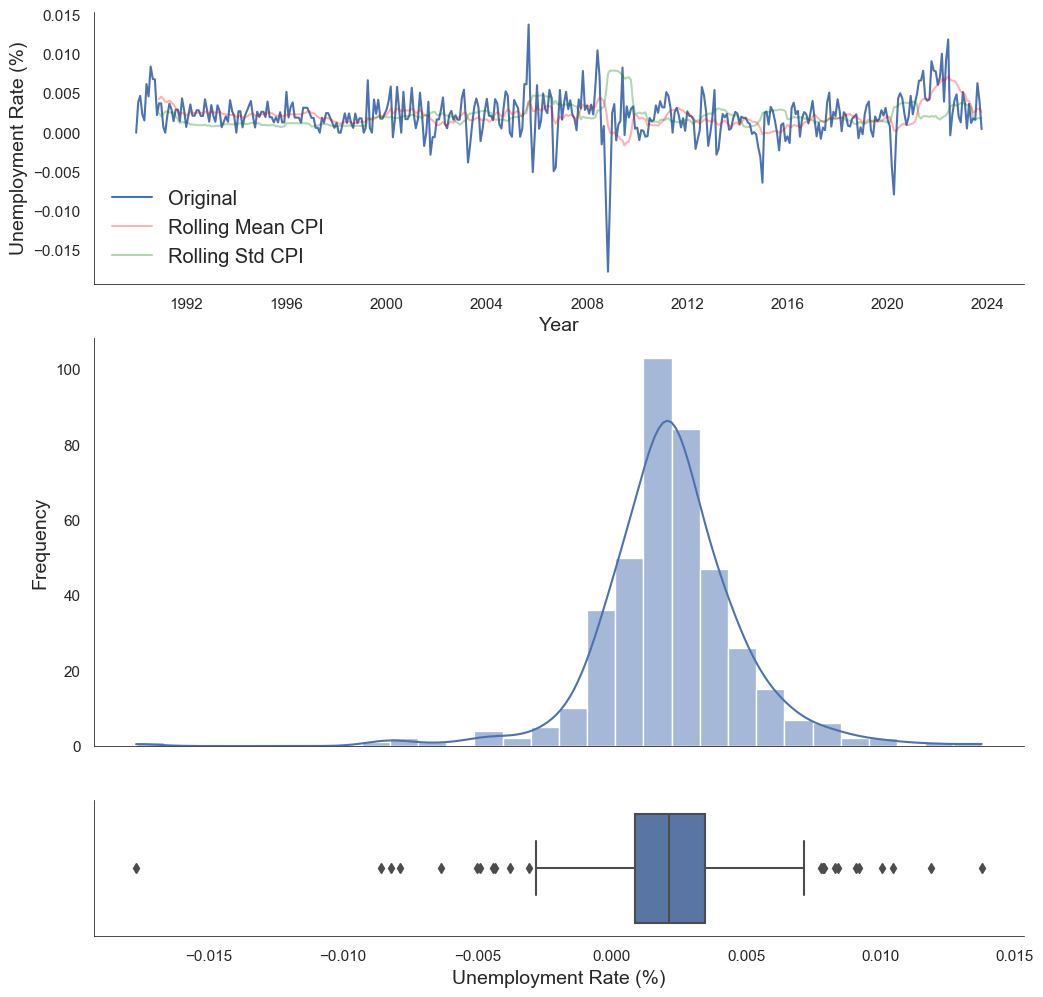

In [108]:
# Modify the code to add the x-axis back to the time series plot
plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 3, 1], hspace=0.2)  # 3 rows, 1 column, with spacing

# Subplot 1: Rolling statistics plot
ax0 = plt.subplot(gs[0])
ax0.plot(cpi_data['Date'], cpi_data['CPI_SA_change'], color='C0', label='Original')
ax0.plot(cpi_data['Date'], cpi_data['Rolling Mean CPI'], color='red', label='Rolling Mean CPI', alpha=0.3)
ax0.plot(cpi_data['Date'], cpi_data['Rolling Std CPI'], color='green', label='Rolling Std CPI', alpha=0.3)
# ax0.set_title('Rolling Mean & Standard Deviation of the Unemployment Rate', fontsize=20)
ax0.set_xlabel('Year', fontsize = 14)
plt.grid(False)
ax0.set_ylabel('Unemployment Rate (%)', fontsize=14)
legend = ax0.legend(fontsize='large')
legend.get_frame().set_edgecolor('none')

# Enable x-ticks for ax0 and remove top/right axis lines
ax0.xaxis.set_tick_params(labelbottom=True)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_color('black')
ax0.spines['bottom'].set_color('black')
ax0.spines['bottom'].set_linewidth(0.5)
ax0.spines['left'].set_linewidth(0.5)
# Subplot 2: Histogram with KDE
ax1 = plt.subplot(gs[1])
sns.histplot(cpi_data['CPI_SA_change'], kde=True, color='C0', bins=30, ax=ax1)
# ax1.set_title('Distribution of Unemployment Rates')
ax1.set_xlabel('')
ax1.set_ylabel('Frequency', fontsize=14)
# Turn off x-ticks for ax1 to avoid overlap with the boxplot below and remove top/right axis lines
ax1.xaxis.set_tick_params(labelbottom=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_linewidth(0.5)

plt.grid(False)

# Subplot 3: Boxplot
ax2 = plt.subplot(gs[2], sharex=ax1)
sns.boxplot(x=cpi_data['CPI_SA_change'], color='C0', ax=ax2)
ax2.set_xlabel('Unemployment Rate (%)', fontsize=14)
ax2.set_ylabel('')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['bottom'].set_linewidth(0.5)
ax2.spines['left'].set_linewidth(0.5)

plt.grid(False)

# Adjust the layout
plt.savefig('../Plots/CPIData.png', bbox_inches='tight', pad_inches=0.1)
plt.tight_layout()
plt.show()